In [22]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

In [23]:
df = pd.read_csv("BostonHousing.csv")

In [24]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [26]:
df=df.dropna()

<Axes: >

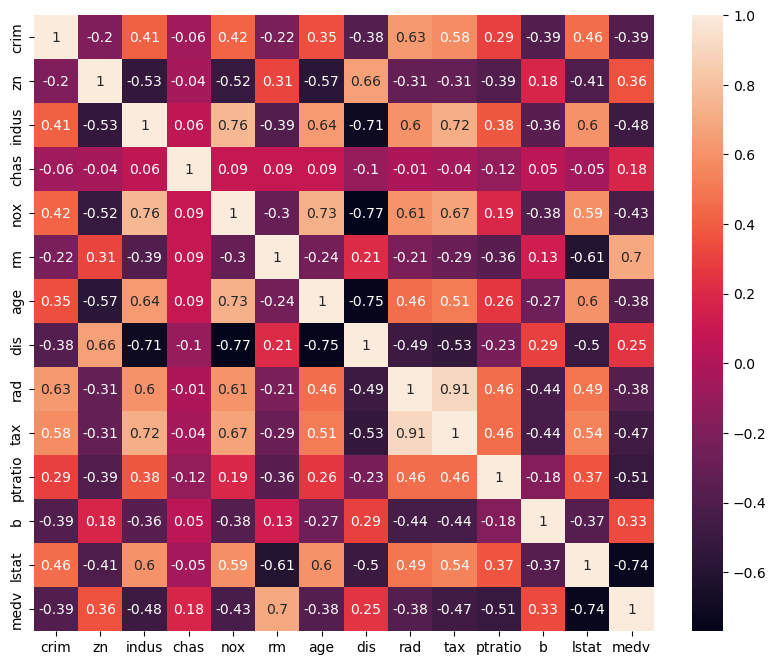

In [27]:
plt.figure(figsize=(10,8))
corr=df.corr().round(2)
sns.heatmap(data=corr,annot=True)

In [28]:
#attibute are lstat ,rm and target varialbe is medv

In [29]:
x1=df[['lstat']]
y=df['medv']
x2=df[['rm']]


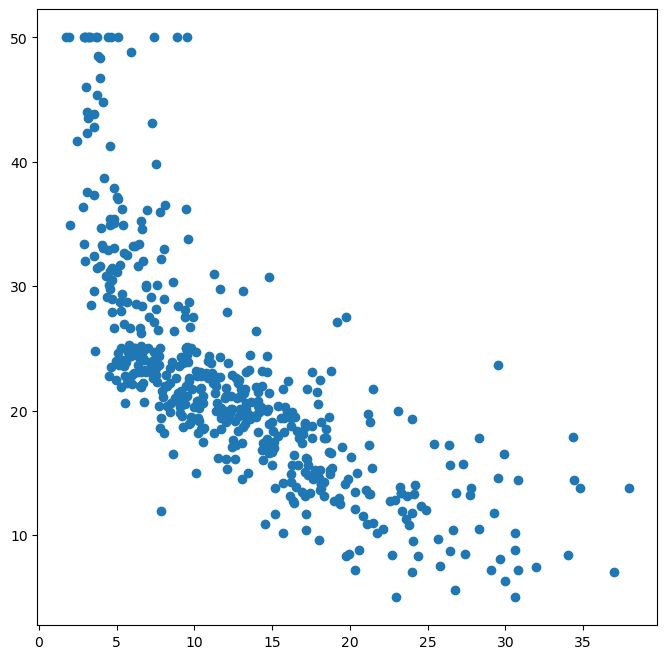

In [32]:
import matplotlib.pyplot as plt

#plotting the scatterplot
plt.figure(figsize=(8,8))

plt.scatter(x1,y)


Text(0.5, 1.0, 'rm')

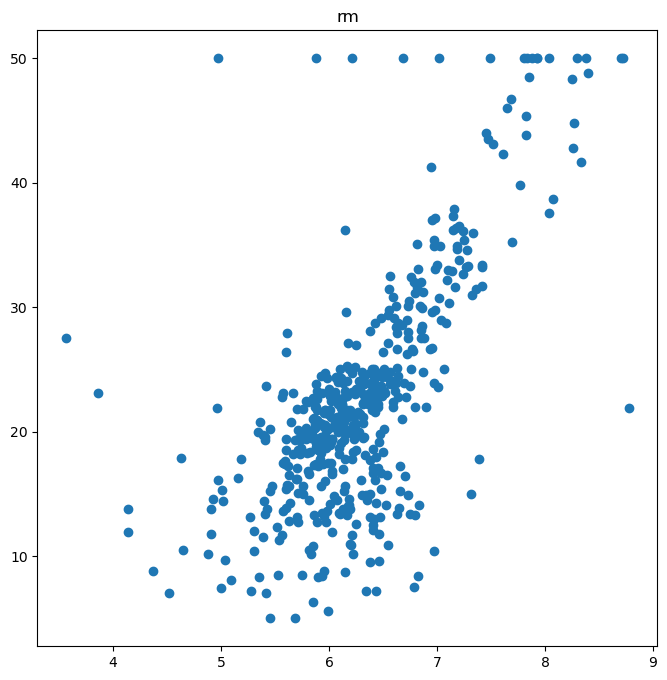

In [37]:
#plotting the scatterplot
plt.figure(figsize=(8,8))

plt.scatter(x2,y)
plt.title('rm')


In [43]:
x=pd.DataFrame(df[['lstat','rm']])
y=pd.DataFrame(df['medv'])

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [50]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [53]:
print('mse:',mse)
print('mae:',mae)
print('r2:',r2)

mse: 37.38310563877996
mae: 4.142444656238561
r2: 0.5409084827186417


In [54]:
import statsmodels.api as sm
modle=sm.OLS(y_train,x_train).fit() 

In [55]:
print(modle.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              3962.
Date:                Tue, 04 Jun 2024   Prob (F-statistic):                   2.80e-265
Time:                        18:26:56   Log-Likelihood:                         -1252.0
No. Observations:                 404   AIC:                                      2508.
Df Residuals:                     402   BIC:                                      2516.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipykernel_4390/1185697507.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lstat'])
/tmp/ipykernel_4390/1185697507.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rm'])


<Axes: xlabel='rm', ylabel='Density'>

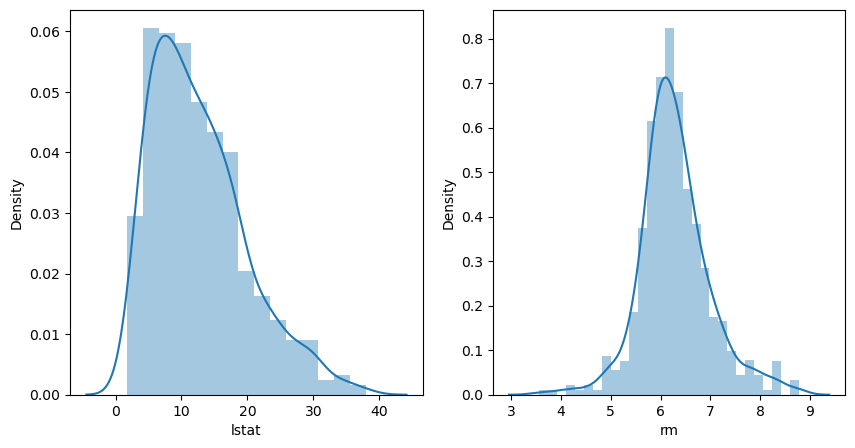

In [56]:
#plot the distribuiton graph
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['lstat'])
plt.subplot(1,2,2)
sns.distplot(df['rm'])


In [61]:
coeff=lr.coef_
intercept=lr.intercept_

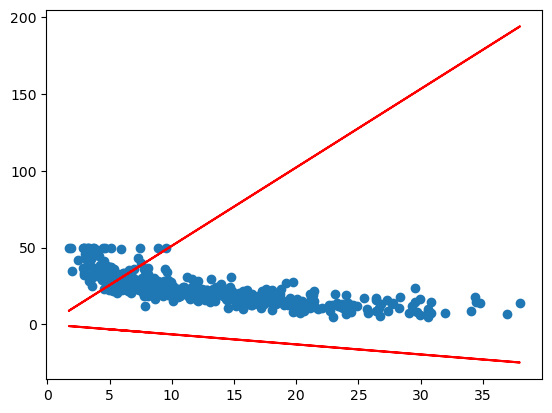

In [71]:
x1_reshaped = x1.values.reshape(-1, 1)
plt.scatter(x1,y,marker='o')
plt.plot(x1_reshaped, coeff*x1_reshaped , 'r')
